# Minería de Datos

*Equipo: 11*

*Grupo: 002, miercoles 7:00-10:00 pm*

**Integrantes:**

* *1819011, González Castillo Fernando Isaí*

* *1563836, Sanabria Martínez Daniela Monserrat*
             
* *1887939, Llanos Morales Alfonso*

# Proyecto Integrador de Aprendizaje

Titulo de la Base de Datos: Mushroom Classification

**Descripción de los datos:**

Nuestra base de datos incluye descripciones de muestras hipotéticas correspondientes a 23 especies de hongos laminados de las familias Agaricus y Lepiota, donde cada especie se identifica como venenosa o comestible.También es importante recalcar que está conformada por 23 columnas que representan las caracteristicas que diferencia a cada hongo, como el color, la textura o la forma; todas las variables de la base son de tipo cualitativa y tienen el valor de un solo caracter; la base tiene 8124 filas, por lo que su tamaño sería de (8124 X 23).

**Justificación del uso de datos:**

La base de datos es muy descriptiva referente a las características de los hongos, contamos con columnas que nos muestran desde su forma, tamaño y color hasta el tipo de zona donde es más común encontrarlo.Al estar los datos recopilados de esta manera consideramos que sería más sencillo trabajar con ella y también nos daba una idea más clara de que tipo de técnica de minería utilizar.

El tipo de datos con los que vamos a trabajar es más intuitivo con relación al tipo de técnica de minería que podemos utilizar, también nos pareció importante el formato de texto para describir las variables, que es en forma categórica, ya que todas ellas están representadas por una letra y creemos que esto nos facilitará las operaciones.

**Objetivos:**

Saber cuáles son las principales características que determinan si un hongo es venenoso o comestible, así como  poder realizar una clasificación completa y efectiva de la totalidad de hongos en la base de datos en el menor tiempo posible.

## Programa de clasificación de hongos

Primero declararemos las librerias que uilizaremos para el desarrollo del programa, las cuales son:

In [1]:
import pandas as pd
import numpy as np
import math
from collections import Counter
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from subprocess import check_output, check_call


A continuación mostramos los datos sin manipulación

In [2]:
hongos = pd.read_csv("mushrooms.csv")

In [3]:
hongos

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
hongos.shape

(8124, 23)

Decidimos traducir los nombres de las columnas y los valores al español para un mejor entendimiento.

In [5]:
hongos = hongos.rename(columns = {'class':'Clase', 'cap-shape':'Forma_Sombrero', 'cap-surface':'Superficie_Sombrero', 'cap-color':'Color_Sombrero', 'bruises':'Magulladura', 'odor':'Olor', 'gill-attachment':'Forma_Laminas', 'gill-spacing':'Espaciamiento_Laminas', 'gill-size':'Dimension_Laminas', 'gill-color':'Color_Laminas', 'stalk-shape':'Forma_Tallo', 'stalk-root':'Raiz_Tallo', 'stalk-surface-above-ring':'Superficie_tallo_sobre_anillo', 'stalk-surface-below-ring':'Superficie_tallo_bajo_anillo', 'stalk-color-above-ring':'Color_tallo_sobre_anillo', 'stalk-color-below-ring':'Color_tallo_bajo_anillo', 'veil-type':'Tipo_Velo', 'veil-color':'Color_Velo', 'ring-number':'Num_anillos', 'ring-type':'Tipo_anillo', 'spore-print-color':'Color_Espora', 'population':'Poblacion', 'habitat':'Habitat'})

In [6]:
v1={"b":"campana","c":"conica","x":"convexa","f":"plana","k":"mamelonado","s":"hundido"}
hongos["Forma_Sombrero"]=hongos["Forma_Sombrero"].replace(v1)
v2={"f": "fibroso", "g": "asurcada","y":"escamoso","s": "liso"}
hongos["Superficie_Sombrero"]=hongos["Superficie_Sombrero"].replace(v2)
v3={"n":"marron","b":"ante","c":"canela","g":"gris","r":"verde","p":"rosa","u":"violeta","e":"rojo","w":"blanco","y":"amarillo"}
hongos["Color_Sombrero"]=hongos["Color_Sombrero"].replace(v3)
v4={"a":"almendra","l":"anis","c":"creosota","y":"pescado","f":"sucio","m":"mohoso","n":"ninguno","p":"acre","s":"picante"}
hongos["Olor"]=hongos["Olor"].replace(v4)
v5={"a":"adherida","f":"libre", "d":"descendente", "n":"con_muescas"}
hongos["Forma_Laminas"]=hongos["Forma_Laminas"].replace(v5)
v6={"c":"cercanas","w":"apretadas", "d":"distantes"}
hongos["Espaciamiento_Laminas"]=hongos["Espaciamiento_Laminas"].replace(v6)
v7={"b":"ancho","n":"estrecho"}
hongos["Dimension_Laminas"]=hongos["Dimension_Laminas"].replace(v7)
v8={"k":"negro","b":"ante","n":"marron","h":"chocolate","g":"gris","r":"verde","o":"naranja","p":"rosa","u":"violeta","e":"rojo","w":"blanco","y":"amarillo"}
hongos["Color_Laminas"]=hongos["Color_Laminas"].replace(v8)
v9={"t":"estrechando","e":"agrandando"}
hongos["Forma_Tallo"]=hongos["Forma_Tallo"].replace(v9)
v10={"b":"bulboso","c":"garrote","e":"iguales","z":"rizomorfos","r":"enraizado","?":"faltante"}
hongos["Raiz_Tallo"]=hongos["Raiz_Tallo"].replace(v10)
v11={"s":"lisa","k":"sedosa","f":"fibrosa","y":"escamosa"}
hongos["Superficie_tallo_sobre_anillo"]=hongos["Superficie_tallo_sobre_anillo"].replace(v11)
hongos["Superficie_tallo_bajo_anillo"]=hongos["Superficie_tallo_bajo_anillo"].replace(v11)
v12={"n":"marron","b":"ante","c":"canela","g":"gris","p":"rosa","e":"rojo","w":"blanco","y":"amarillo","o":"naranja"}
hongos["Color_tallo_sobre_anillo"]=hongos["Color_tallo_sobre_anillo"].replace(v12)
hongos["Color_tallo_bajo_anillo"]=hongos["Color_tallo_bajo_anillo"].replace(v12)
v13={"p":"parcial","u":"universal"} 
hongos["Tipo_Velo"]=hongos["Tipo_Velo"].replace(v13)
v14={"n":"marron","o":"naranja","w":"blanco","y":"amarillo"} 
hongos["Color_Velo"]=hongos["Color_Velo"].replace(v14)
v15= {"n":"ninguno","o":"uno","t":"dos"}
hongos["Num_anillos"]=hongos["Num_anillos"].replace(v15)
v16={"c":"cortina","e":"evanescente","f":"llamarada","l":"grande","n":"ninguno","p":"colgante","s":"ascendente","z":"fugaz"}
hongos["Tipo_anillo"]=hongos["Tipo_anillo"].replace(v16)
v17= {"k":"negro","n":"marron","b":"ante","h":"chocolate","r":"verde","o":"naranja","u":"violeta","w":"blanco","y":"amarillo"}
hongos["Color_Espora"]=hongos["Color_Espora"].replace(v17)
v18={"a":"abundantes","c":"agrupados","n":"numerosos","s":"dispersos","v":"varios","y":"solitario"}
hongos["Poblacion"]=hongos["Poblacion"].replace(v18)
v19={"g":"pastos","l":"hojas","m":"prados","p":"caminos","u":"zona_urbana","w":"residuos","d":"bosques"}
hongos["Habitat"]=hongos["Habitat"].replace(v19)
v20={"t":"tiene","f":"no_tiene"}
hongos["Magulladura"]=hongos["Magulladura"].replace(v20)
v21={"p":"venenoso", "e":"comestible"}
hongos["Clase"]=hongos["Clase"].replace(v21)

Como la columna del tipo de velo solo contiene un único valor, el de "parcial", podemos eliminar dicha columna.

In [7]:
hongos.Tipo_Velo.unique()

array(['parcial'], dtype=object)

In [8]:
hongos = hongos.drop('Tipo_Velo', axis = 1)

In [9]:
hongos

,Clase,Forma_Sombrero,Superficie_Sombrero,Color_Sombrero,Magulladura,Olor,Forma_Laminas,Espaciamiento_Laminas,Dimension_Laminas,Color_Laminas,...,Superficie_tallo_sobre_anillo,Superficie_tallo_bajo_anillo,Color_tallo_sobre_anillo,Color_tallo_bajo_anillo,Color_Velo,Num_anillos,Tipo_anillo,Color_Espora,Poblacion,Habitat
0,venenoso,convexa,liso,marron,tiene,acre,libre,cercanas,estrecho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,negro,dispersos,zona_urbana
1,comestible,convexa,liso,amarillo,tiene,almendra,libre,cercanas,ancho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,marron,numerosos,pastos
2,comestible,campana,liso,blanco,tiene,anis,libre,cercanas,ancho,marron,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,marron,numerosos,prados
3,venenoso,convexa,escamoso,blanco,tiene,acre,libre,cercanas,estrecho,marron,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,negro,dispersos,zona_urbana
4,comestible,convexa,liso,gris,no_tiene,ninguno,libre,apretadas,ancho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,evanescente,marron,abundantes,pastos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,comestible,mamelonado,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,amarillo,...,lisa,lisa,naranja,naranja,naranja,uno,colgante,ante,agrupados,hojas
8120,comestible,convexa,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,amarillo,...,lisa,lisa,naranja,naranja,marron,uno,colgante,ante,varios,hojas
8121,comestible,plana,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,marron,...,lisa,lisa,naranja,naranja,naranja,uno,colgante,ante,agrupados,hojas
8122,venenoso,mamelonado,escamoso,marron,no_tiene,pescado,libre,cercanas,estrecho,ante,...,lisa,sedosa,blanco,blanco,blanco,uno,evanescente,blanco,varios,hojas


Buscamos la existencia de datos nulos en nuestra base, llegando a la conclusión de que no contabamos con dichos datos, por lo que no tendríamos que manipular la base de datos en este punto.

In [10]:
hongos.isnull().any()

Clase                            False
Forma_Sombrero                   False
Superficie_Sombrero              False
Color_Sombrero                   False
Magulladura                      False
Olor                             False
Forma_Laminas                    False
Espaciamiento_Laminas            False
Dimension_Laminas                False
Color_Laminas                    False
Forma_Tallo                      False
Raiz_Tallo                       False
Superficie_tallo_sobre_anillo    False
Superficie_tallo_bajo_anillo     False
Color_tallo_sobre_anillo         False
Color_tallo_bajo_anillo          False
Color_Velo                       False
Num_anillos                      False
Tipo_anillo                      False
Color_Espora                     False
Poblacion                        False
Habitat                          False
dtype: bool

In [11]:
hongos.isnull().sum()

Clase                            0
Forma_Sombrero                   0
Superficie_Sombrero              0
Color_Sombrero                   0
Magulladura                      0
Olor                             0
Forma_Laminas                    0
Espaciamiento_Laminas            0
Dimension_Laminas                0
Color_Laminas                    0
Forma_Tallo                      0
Raiz_Tallo                       0
Superficie_tallo_sobre_anillo    0
Superficie_tallo_bajo_anillo     0
Color_tallo_sobre_anillo         0
Color_tallo_bajo_anillo          0
Color_Velo                       0
Num_anillos                      0
Tipo_anillo                      0
Color_Espora                     0
Poblacion                        0
Habitat                          0
dtype: int64

Se realizó una prueba para determinar la unicidad de los datos por la cual podemos afirmar que no contamos con filas duplicadas, esto nos quiere decir que todos los hongos dentro de la base de datos son distintos en al menos una característica, por lo que no será imposible darle una clasificación a un hongo en especifico ni será necesario eliminar o modificar alguna de las filas.

In [12]:
len(hongos)

8124

In [13]:
hongos.drop_duplicates()
len(hongos.drop_duplicates())

8124

Al finalizar el trabajo de preprocesamiento decidimos crear un archivo con la base de datos editada

In [14]:
hongos.to_csv("BD_hongos.csv", index = False)

In [15]:
hongos

,Clase,Forma_Sombrero,Superficie_Sombrero,Color_Sombrero,Magulladura,Olor,Forma_Laminas,Espaciamiento_Laminas,Dimension_Laminas,Color_Laminas,...,Superficie_tallo_sobre_anillo,Superficie_tallo_bajo_anillo,Color_tallo_sobre_anillo,Color_tallo_bajo_anillo,Color_Velo,Num_anillos,Tipo_anillo,Color_Espora,Poblacion,Habitat
0,venenoso,convexa,liso,marron,tiene,acre,libre,cercanas,estrecho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,negro,dispersos,zona_urbana
1,comestible,convexa,liso,amarillo,tiene,almendra,libre,cercanas,ancho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,marron,numerosos,pastos
2,comestible,campana,liso,blanco,tiene,anis,libre,cercanas,ancho,marron,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,marron,numerosos,prados
3,venenoso,convexa,escamoso,blanco,tiene,acre,libre,cercanas,estrecho,marron,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,negro,dispersos,zona_urbana
4,comestible,convexa,liso,gris,no_tiene,ninguno,libre,apretadas,ancho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,evanescente,marron,abundantes,pastos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,comestible,mamelonado,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,amarillo,...,lisa,lisa,naranja,naranja,naranja,uno,colgante,ante,agrupados,hojas
8120,comestible,convexa,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,amarillo,...,lisa,lisa,naranja,naranja,marron,uno,colgante,ante,varios,hojas
8121,comestible,plana,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,marron,...,lisa,lisa,naranja,naranja,naranja,uno,colgante,ante,agrupados,hojas
8122,venenoso,mamelonado,escamoso,marron,no_tiene,pescado,libre,cercanas,estrecho,ante,...,lisa,sedosa,blanco,blanco,blanco,uno,evanescente,blanco,varios,hojas


El siguiente paso fue realizar un análisis exploratorio de la base de datos utilizando gráficas y métodos estadísticos

In [16]:
100*hongos['Clase'].value_counts()/len(hongos['Clase'])

comestible    51.797144
venenoso      48.202856
Name: Clase, dtype: float64

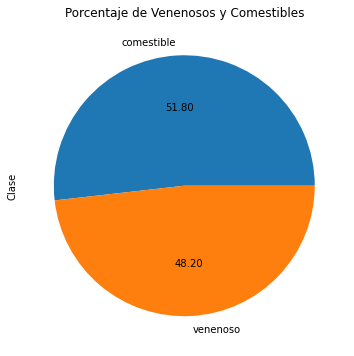

In [17]:
hongos['Clase'].value_counts().plot(kind = "pie",  autopct='%.2f', figsize=(6, 6), title='Porcentaje de Venenosos y Comestibles')

 El gráfico de pastel anterior nos sirvió para apreciar las proporciones de hongos comestibles y venenosos con los que contamos en nuestra base de datos y así darnos cuenta que las cantidades son similares en ambas categorias.

Después se utilizó un algoritmo que utiliza el coeficiente de incertidumbre explicado en seguida para determinar que características tenían más relación con la respuesta.

#### Uncertainty coefficient o Coeficente de Incertidumbre

En estadística es coeficiente de incertidumbre, también conocido como *coeficiente de entropía*, es una medida de asociación nominal. Este es útil para medir la validez de un algritmo de clasificación estadística. El coeficiente de incertidumbre toma valores entre 0 y 1, donde 0 significa que la característica $y$ no provee información acerca de la característica $x$, y 1 significa que $y$ provee de toda la información acerca del valor de la característica $x$.

Link: https://en.wikipedia.org/wiki/Uncertainty_coefficient

In [18]:
def condicional_entropia(x,y):
    y_contador = Counter(y)
    xy_contador = Counter(list(zip(x,y)))
    T_ocurrencias = sum(y_contador.values())
    entropia = 0
    for i in xy_contador.keys():
        p_xy = xy_contador[i] / T_ocurrencias
        p_y = y_contador[i[1]] / T_ocurrencias
        entropia = entropia + (p_xy * math.log(p_y/p_xy))
    return entropia

def Coef_In(x,y):
    s_xy = condicional_entropia(x,y)
    x_contador = Counter(x)
    T_ocurrencias = sum(x_contador.values())
    p_x = list(map(lambda n: n/T_ocurrencias, x_contador.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

En el código anterior se declaran dos funciones que serán utilizadas a continuación, en la primera, *condicional_entropia()* se realiza el cálculo de la entropía entre las variables $x$ y $y$ utilizando las frecuencias y la formula mostrada en el link de la parte superior, este valor será guardado y utilizado en la función siguiente, *Coef_In()*, donde se obtendrá el coeficiente de incertidumbre.

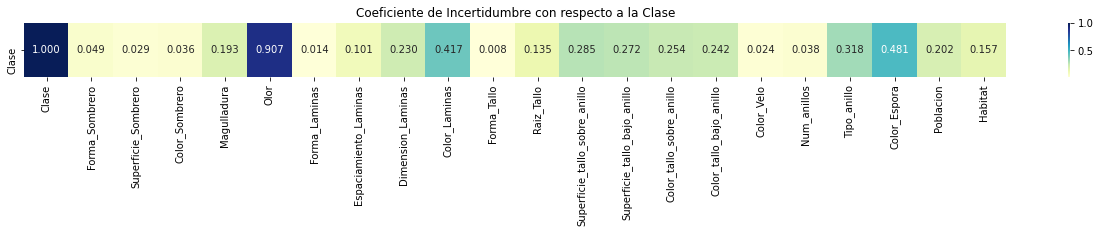

In [19]:
CI = pd.DataFrame(index=['Clase'],columns=hongos.columns)
columns = hongos.columns
for j in range(0,len(columns)):
    u = Coef_In(hongos['Clase'].tolist(),hongos[columns[j]].tolist())
    CI.loc[:,columns[j]] = u
CI.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(22,1))
sns.heatmap(CI,annot=True,fmt='.3f', cmap = "YlGnBu")
plt.title("Coeficiente de Incertidumbre con respecto a la Clase")
plt.show()

Como podemos observar las características que más influyen en el hecho de que un hongo sea venenoso o comestible son el olor, el color de las láminas y el color de las esporas, por lo que para nuestros siguientes análisis nos enfocaremos en estas tres características.

Nos apoyamos en el código de Raul E. Lopez Briega para la realización de los siguientes análisis

Link: https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/

Ahora utilizando la función *crosstab()* de *pandas* obtendremos las frecuencias y proporciones de la relación entre las columnas *Clase* y *Olor* por medio de tablas de contingencia.

In [20]:
pd.crosstab(index=hongos['Clase'], columns = hongos['Olor'], margins=True)

Olor,acre,almendra,anis,creosota,mohoso,ninguno,pescado,picante,sucio,All
Clase,,,,,,,,,,
comestible,0,400,400,0,0,3408,0,0,0,4208
venenoso,256,0,0,192,36,120,576,576,2160,3916
All,256,400,400,192,36,3528,576,576,2160,8124


In [21]:
pd.crosstab(index=hongos['Clase'], columns = hongos['Olor'], margins=True).apply(lambda r: r/len(hongos) *100, axis=1)

Olor,acre,almendra,anis,creosota,mohoso,ninguno,pescado,picante,sucio,All
Clase,,,,,,,,,,
comestible,0.000000,4.923683,4.923683,0.000000,0.000000,41.949778,0.000000,0.000000,0.000000,51.797144
venenoso,3.151157,0.000000,0.000000,2.363368,0.443131,1.477105,7.090103,7.090103,26.587888,48.202856
All,3.151157,4.923683,4.923683,2.363368,0.443131,43.426883,7.090103,7.090103,26.587888,100.000000


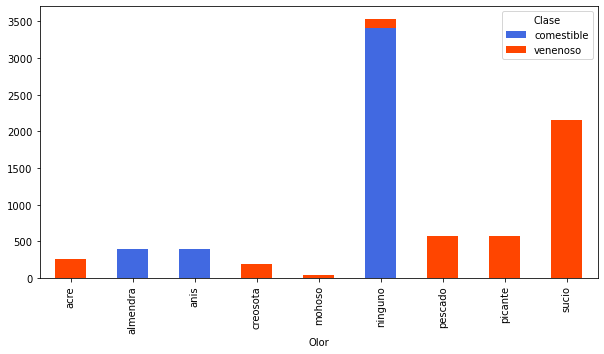

In [22]:
pd.crosstab(index=hongos['Olor'], columns = hongos['Clase']).plot(kind = "bar", stacked=True, figsize = (10, 5), color = ['royalblue', 'orangered'])

Por la distribución de las frecuencias en la tablas de contingencia y analizando el gráfico de barras notamos que los hongos venesosos y comestibles tienen olores muy caracteristicos, como por ejemplo los hongos comestibles tienen olores similares a almendras y anís, en cambio los hongos venenosos tienen un aroma similar a acre, picante, pescado o a sucio. El problema será cuando el hongo no presente ningún olor, ya que los hongos venenosos y comestibles comparten esta caracteristica.

Para confirmar estos resultados con otra prueba estadística y al poseer únicamente variables categoricas fue necesaria la aplicación del algoritmo de variables dummy, y así crear una matriz de correlación entre las nuevas variables dummy.  

#### Dummy variable algorithm o algoritmo de variables ficticias.
Una variable ficticia es aquella que toma solo el valor 0 o 1 para indicar la ausencia o presencia de algún efecto categórico que se puede esperar que cambie el resultado.

Link: https://youtu.be/DAQhQFp-sCg

In [23]:
Clase_Olor = pd.get_dummies(hongos["Clase"], prefix = "Clase")
Olor = pd.get_dummies(hongos["Olor"], prefix = "Olor")
Clase_Olor = pd.concat([Clase_Olor, Olor], axis = 1)
Clase_Olor

,Clase_comestible,Clase_venenoso,Olor_acre,Olor_almendra,Olor_anis,Olor_creosota,Olor_mohoso,Olor_ninguno,Olor_pescado,Olor_picante,Olor_sucio
0,0,1,1,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,0,0,1,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,0
8121,1,0,0,0,0,0,0,1,0,0,0
8122,0,1,0,0,0,0,0,0,1,0,0


Utilizando la función *get_dummies()* de la librería *pandas* podemos transformar columnas específicas de nuestra base de datos a valores binarios, donde el 1 representa la presencia y 0 la ausencia de la categoria en cuestión, luego con la función *concat* también de la librería *pandas* concatenamos ambos DataFrames.

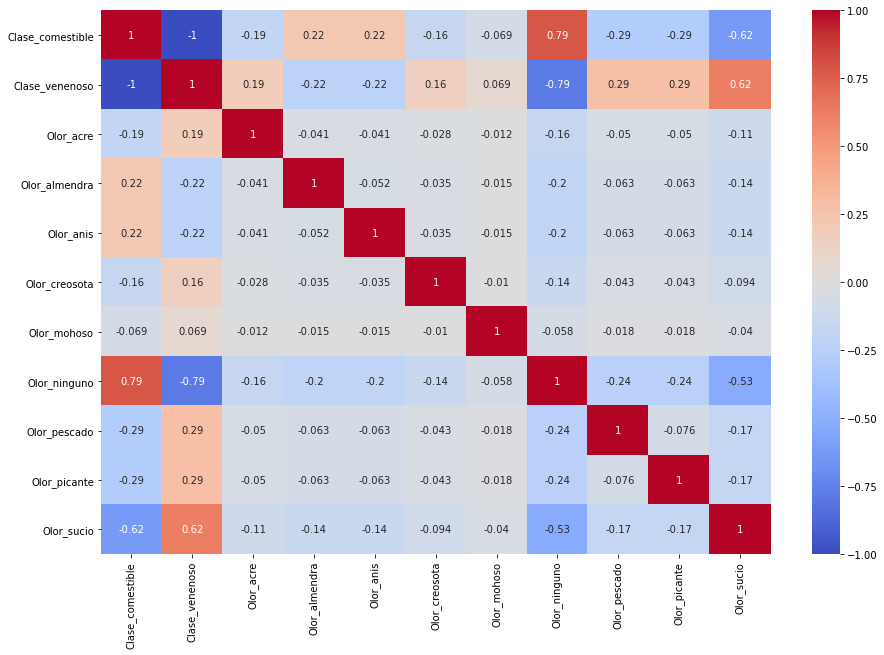

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(Clase_Olor.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

Utilizar variables ficticias nos da la oportunidad de obtener la correlación entre las posibles respuestas de nuestra columna objetivo *Clase* y la que fue más significativa utilizando el coeficiente de incertidumbre *Olor*, así podemos darnos cuenta que los olores que más están relacionados con los hongos comestibles son el olor a almendra, anís y sin olor (esto debido a que la gran mayoria de hongos sin olor en la base de datos son comestibles, pero esta respuesta no nos da un resultado claro), en cambio para los hongos venenosos son pescado, picante y sucio. Tomando en cuenta los resultados obtenidos de la gráfica de frecuencias, las tablas de contingencia y la matríz de correlaciones podemos llegar a las mismas conclusiones, donde podríamos determinar si un hongo es comestible o venenoso únicamente con su olor, con excepción de los hongos que no presentan olor, por lo que tendríamos que seguir comparando características para llegar a una mejor conclusión.

Como la columna *Olor* no nos aporta un resultado claro para todas las opciones, pasamos a realizar el análisis entre la característica objetivo y la segunda columna más significativa *Color_Espora*.

Como sólo nos quedan por clasificar los hongos sin olor crearemos un nuevo DataFrame donde se incluyan únicamente los hongos con esta característica.

In [25]:
hongos_sin_olor = hongos[hongos['Olor'].isin(['ninguno'])]
hongos_sin_olor

,Clase,Forma_Sombrero,Superficie_Sombrero,Color_Sombrero,Magulladura,Olor,Forma_Laminas,Espaciamiento_Laminas,Dimension_Laminas,Color_Laminas,...,Superficie_tallo_sobre_anillo,Superficie_tallo_bajo_anillo,Color_tallo_sobre_anillo,Color_tallo_bajo_anillo,Color_Velo,Num_anillos,Tipo_anillo,Color_Espora,Poblacion,Habitat
4,comestible,convexa,liso,gris,no_tiene,ninguno,libre,apretadas,ancho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,evanescente,marron,abundantes,pastos
14,comestible,convexa,fibroso,marron,no_tiene,ninguno,libre,apretadas,ancho,marron,...,lisa,fibrosa,blanco,blanco,blanco,uno,evanescente,negro,abundantes,pastos
15,comestible,hundido,fibroso,gris,no_tiene,ninguno,libre,cercanas,estrecho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,marron,solitario,zona_urbana
16,comestible,plana,fibroso,blanco,no_tiene,ninguno,libre,apretadas,ancho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,evanescente,marron,abundantes,pastos
28,comestible,plana,fibroso,marron,no_tiene,ninguno,libre,cercanas,estrecho,negro,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,negro,solitario,zona_urbana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,comestible,convexa,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,amarillo,...,lisa,lisa,naranja,naranja,naranja,uno,colgante,naranja,varios,hojas
8119,comestible,mamelonado,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,amarillo,...,lisa,lisa,naranja,naranja,naranja,uno,colgante,ante,agrupados,hojas
8120,comestible,convexa,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,amarillo,...,lisa,lisa,naranja,naranja,marron,uno,colgante,ante,varios,hojas
8121,comestible,plana,liso,marron,no_tiene,ninguno,adherida,cercanas,ancho,marron,...,lisa,lisa,naranja,naranja,naranja,uno,colgante,ante,agrupados,hojas


In [26]:
hongos_sin_olor.Olor.unique()

array(['ninguno'], dtype=object)

In [27]:
pd.crosstab(index=hongos_sin_olor['Clase'], columns = hongos_sin_olor['Color_Espora'], margins=True)

Color_Espora,amarillo,ante,blanco,chocolate,marron,naranja,negro,verde,All
Clase,,,,,,,,,
comestible,48,48,576,48,1344,48,1296,0,3408
venenoso,0,0,48,0,0,0,0,72,120
All,48,48,624,48,1344,48,1296,72,3528


In [28]:
pd.crosstab(index=hongos_sin_olor['Clase'], columns = hongos_sin_olor['Color_Espora'], margins=True).apply(lambda r: r/len(hongos) *100, axis=1)

Color_Espora,amarillo,ante,blanco,chocolate,marron,naranja,negro,verde,All
Clase,,,,,,,,,
comestible,0.590842,0.590842,7.090103,0.590842,16.543575,0.590842,15.952733,0.000000,41.949778
venenoso,0.000000,0.000000,0.590842,0.000000,0.000000,0.000000,0.000000,0.886263,1.477105
All,0.590842,0.590842,7.680945,0.590842,16.543575,0.590842,15.952733,0.886263,43.426883


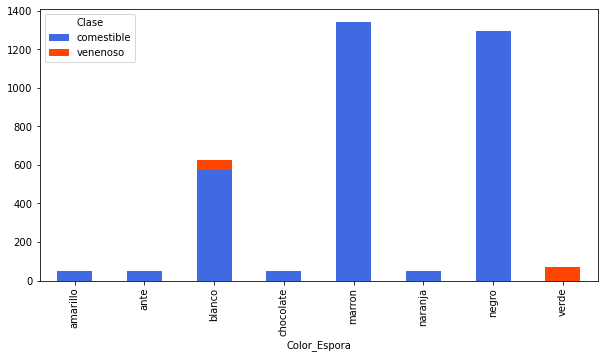

In [29]:
pd.crosstab(index=hongos_sin_olor['Color_Espora'], columns = hongos_sin_olor['Clase']).plot(kind = "bar", stacked=True, figsize = (10, 5), color = ['royalblue', 'orangered'])

Con la ayuda de la tabla de frecuencia y el gráfico identificamos si existen carecteristicas únicas o diferenciadoras con respecto al color de las esporas para los hongos que nos quedan sin clasificar, es decir, los hongos sin olor. Por lo que podemos decir que si son de color amarillo, ante, chocolate, marrón, naranja o negro podemos suponer que el hongo es comesible, en cambio si son de color verde podemos suponer que se trata de un hongo venenoso. Por lo que aún nos quedarán sin clasificar los hongos que no presenten olor y que además el color de sus esporas sea blanco.

De forma similar al paso anterior creamos un nuevo DataFrame donde sólo se incluyan los hongos sin olor y con el color de sus esporas blanco.

In [30]:
hongos_sinOlor_ColEspBlanco = hongos_sin_olor[hongos_sin_olor['Color_Espora'].isin(['blanco'])]
hongos_sinOlor_ColEspBlanco

,Clase,Forma_Sombrero,Superficie_Sombrero,Color_Sombrero,Magulladura,Olor,Forma_Laminas,Espaciamiento_Laminas,Dimension_Laminas,Color_Laminas,...,Superficie_tallo_sobre_anillo,Superficie_tallo_bajo_anillo,Color_tallo_sobre_anillo,Color_tallo_bajo_anillo,Color_Velo,Num_anillos,Tipo_anillo,Color_Espora,Poblacion,Habitat
3984,comestible,convexa,escamoso,ante,tiene,ninguno,libre,cercanas,ancho,rojo,...,lisa,lisa,rojo,blanco,blanco,dos,evanescente,blanco,agrupados,residuos
4165,comestible,plana,fibroso,canela,no_tiene,ninguno,libre,apretadas,estrecho,blanco,...,fibrosa,fibrosa,blanco,marron,blanco,uno,evanescente,blanco,varios,hojas
4276,comestible,mamelonado,escamoso,marron,no_tiene,ninguno,libre,apretadas,estrecho,blanco,...,fibrosa,fibrosa,blanco,marron,blanco,uno,evanescente,blanco,varios,hojas
4283,comestible,plana,liso,rosa,tiene,ninguno,libre,cercanas,ancho,rojo,...,lisa,lisa,blanco,blanco,blanco,dos,evanescente,blanco,agrupados,residuos
4291,comestible,mamelonado,liso,rosa,tiene,ninguno,libre,cercanas,ancho,rojo,...,lisa,lisa,blanco,rojo,blanco,dos,evanescente,blanco,agrupados,residuos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,comestible,campana,liso,gris,no_tiene,ninguno,libre,apretadas,ancho,gris,...,sedosa,lisa,blanco,blanco,blanco,dos,colgante,blanco,numerosos,pastos
8096,comestible,mamelonado,fibroso,blanco,no_tiene,ninguno,libre,apretadas,ancho,blanco,...,sedosa,lisa,blanco,blanco,blanco,dos,colgante,blanco,numerosos,pastos
8099,comestible,mamelonado,fibroso,blanco,no_tiene,ninguno,libre,apretadas,ancho,blanco,...,sedosa,sedosa,blanco,blanco,blanco,dos,colgante,blanco,dispersos,pastos
8109,comestible,campana,liso,blanco,no_tiene,ninguno,libre,apretadas,ancho,blanco,...,lisa,lisa,blanco,blanco,blanco,dos,colgante,blanco,numerosos,pastos


In [31]:
hongos_sinOlor_ColEspBlanco.Color_Espora.unique()

array(['blanco'], dtype=object)

El último análisis que realizaremos con las columna objetivo *Clase* será con *Color_Laminas*

In [32]:
pd.crosstab(index=hongos_sinOlor_ColEspBlanco['Clase'], columns = hongos_sinOlor_ColEspBlanco['Color_Laminas'], margins=True)

Color_Laminas,amarillo,blanco,gris,rojo,rosa,All
Clase,,,,,,
comestible,0,288,96,96,96,576
venenoso,4,44,0,0,0,48
All,4,332,96,96,96,624


In [33]:
pd.crosstab(index=hongos_sinOlor_ColEspBlanco['Clase'], columns = hongos_sinOlor_ColEspBlanco['Color_Laminas'], margins=True).apply(lambda r: r/len(hongos) *100, axis=1)

Color_Laminas,amarillo,blanco,gris,rojo,rosa,All
Clase,,,,,,
comestible,0.000000,3.545052,1.181684,1.181684,1.181684,7.090103
venenoso,0.049237,0.541605,0.000000,0.000000,0.000000,0.590842
All,0.049237,4.086657,1.181684,1.181684,1.181684,7.680945


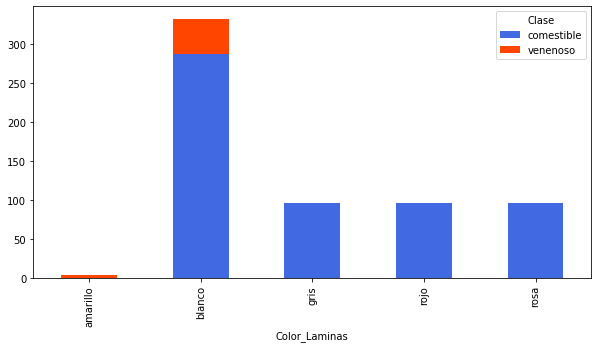

In [34]:
pd.crosstab(index=hongos_sinOlor_ColEspBlanco['Color_Laminas'], columns = hongos_sinOlor_ColEspBlanco['Clase']).plot(kind = "bar", stacked=True, figsize = (10, 5), color = ['royalblue', 'orangered'])

Con la ayuda de la tabla de frecuencia y el gráfico identificamos si existen carecterísticas únicas o diferenciadoras con respecto al color de sus láminas para los hongos que nos quedan sin clasificar, ya que si un hongo tiene sus láminas de color gris, rojo o rosa, puede tratarse de un hongo comestible, y cuando sus láminas son de color amarillo se trata de un hongo venenoso. Por lo que sólo nos quedaría por clasificar a los hongos con color de las láminas blanco y que además no presentan olor y sus esporas también son blancas.

Podemos notar que de los 8124 hongos existentes en la base de datos nos quedan sin clasificar 332, lo que correspondería a un 4.086% del total, es decir, hemos podido clasificar a un 95.9133% del total de hongos en la base.

In [35]:
hongos_332 = hongos_sinOlor_ColEspBlanco[hongos_sinOlor_ColEspBlanco['Color_Laminas'].isin(['blanco'])]
hongos_332

,Clase,Forma_Sombrero,Superficie_Sombrero,Color_Sombrero,Magulladura,Olor,Forma_Laminas,Espaciamiento_Laminas,Dimension_Laminas,Color_Laminas,...,Superficie_tallo_sobre_anillo,Superficie_tallo_bajo_anillo,Color_tallo_sobre_anillo,Color_tallo_bajo_anillo,Color_Velo,Num_anillos,Tipo_anillo,Color_Espora,Poblacion,Habitat
4165,comestible,plana,fibroso,canela,no_tiene,ninguno,libre,apretadas,estrecho,blanco,...,fibrosa,fibrosa,blanco,marron,blanco,uno,evanescente,blanco,varios,hojas
4276,comestible,mamelonado,escamoso,marron,no_tiene,ninguno,libre,apretadas,estrecho,blanco,...,fibrosa,fibrosa,blanco,marron,blanco,uno,evanescente,blanco,varios,hojas
4331,venenoso,mamelonado,escamoso,marron,no_tiene,ninguno,libre,cercanas,estrecho,blanco,...,sedosa,escamosa,blanco,marron,blanco,uno,evanescente,blanco,varios,bosques
4364,venenoso,campana,escamoso,blanco,tiene,ninguno,libre,apretadas,estrecho,blanco,...,lisa,lisa,blanco,blanco,blanco,uno,colgante,blanco,agrupados,hojas
4491,comestible,plana,fibroso,canela,no_tiene,ninguno,libre,apretadas,estrecho,blanco,...,lisa,fibrosa,blanco,marron,blanco,uno,evanescente,blanco,varios,hojas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,comestible,mamelonado,fibroso,blanco,no_tiene,ninguno,libre,apretadas,ancho,blanco,...,sedosa,lisa,blanco,blanco,blanco,dos,colgante,blanco,dispersos,pastos
8074,comestible,campana,fibroso,gris,no_tiene,ninguno,libre,apretadas,ancho,blanco,...,sedosa,sedosa,blanco,blanco,blanco,dos,colgante,blanco,numerosos,pastos
8096,comestible,mamelonado,fibroso,blanco,no_tiene,ninguno,libre,apretadas,ancho,blanco,...,sedosa,lisa,blanco,blanco,blanco,dos,colgante,blanco,numerosos,pastos
8099,comestible,mamelonado,fibroso,blanco,no_tiene,ninguno,libre,apretadas,ancho,blanco,...,sedosa,sedosa,blanco,blanco,blanco,dos,colgante,blanco,dispersos,pastos


In [36]:
hongos_332.Color_Laminas.unique()

array(['blanco'], dtype=object)

In [37]:
1-(len(hongos_332)/len(hongos))

0.9591334318069916

De los 332 datos restantes volvimos a aplicar el algoritmo de coeficientes de incertidumbre pero ahora para determinar cuales eran las características que no influían en el tipo de hongo y así eliminarlas, de esta manera descubrimos que, además de las características ya analizadas anteriormente, *Forma_Laminas* y *Forma_Tallo* no están relacionadas con la respuesta.

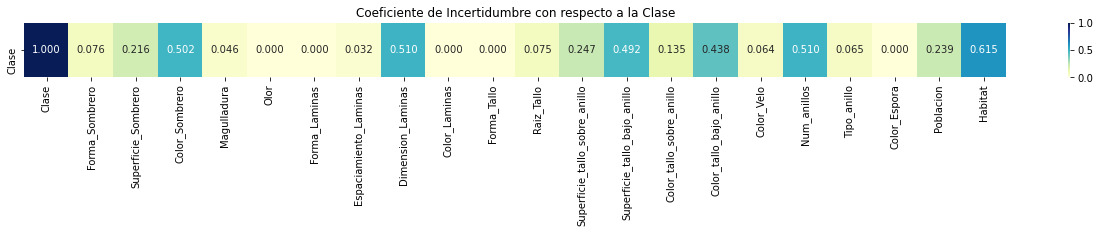

In [38]:
CI = pd.DataFrame(index=['Clase'],columns=hongos_332.columns)
columns = hongos_332.columns
for j in range(0,len(columns)):
    u = Coef_In(hongos_332['Clase'].tolist(),hongos_332[columns[j]].tolist())
    CI.loc[:,columns[j]] = u
CI.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(22,1))
sns.heatmap(CI,annot=True,fmt='.3f', cmap = "YlGnBu")
plt.title("Coeficiente de Incertidumbre con respecto a la Clase")
plt.show()

In [39]:
hongos_332 = hongos_332.drop(['Olor', 'Forma_Laminas', 'Color_Laminas', 'Forma_Tallo', 'Color_Espora'], axis = 1)
hongos_332

,Clase,Forma_Sombrero,Superficie_Sombrero,Color_Sombrero,Magulladura,Espaciamiento_Laminas,Dimension_Laminas,Raiz_Tallo,Superficie_tallo_sobre_anillo,Superficie_tallo_bajo_anillo,Color_tallo_sobre_anillo,Color_tallo_bajo_anillo,Color_Velo,Num_anillos,Tipo_anillo,Poblacion,Habitat
4165,comestible,plana,fibroso,canela,no_tiene,apretadas,estrecho,bulboso,fibrosa,fibrosa,blanco,marron,blanco,uno,evanescente,varios,hojas
4276,comestible,mamelonado,escamoso,marron,no_tiene,apretadas,estrecho,bulboso,fibrosa,fibrosa,blanco,marron,blanco,uno,evanescente,varios,hojas
4331,venenoso,mamelonado,escamoso,marron,no_tiene,cercanas,estrecho,faltante,sedosa,escamosa,blanco,marron,blanco,uno,evanescente,varios,bosques
4364,venenoso,campana,escamoso,blanco,tiene,apretadas,estrecho,bulboso,lisa,lisa,blanco,blanco,blanco,uno,colgante,agrupados,hojas
4491,comestible,plana,fibroso,canela,no_tiene,apretadas,estrecho,bulboso,lisa,fibrosa,blanco,marron,blanco,uno,evanescente,varios,hojas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,comestible,mamelonado,fibroso,blanco,no_tiene,apretadas,ancho,faltante,sedosa,lisa,blanco,blanco,blanco,dos,colgante,dispersos,pastos
8074,comestible,campana,fibroso,gris,no_tiene,apretadas,ancho,faltante,sedosa,sedosa,blanco,blanco,blanco,dos,colgante,numerosos,pastos
8096,comestible,mamelonado,fibroso,blanco,no_tiene,apretadas,ancho,faltante,sedosa,lisa,blanco,blanco,blanco,dos,colgante,numerosos,pastos
8099,comestible,mamelonado,fibroso,blanco,no_tiene,apretadas,ancho,faltante,sedosa,sedosa,blanco,blanco,blanco,dos,colgante,dispersos,pastos


Es necesario conocer la razón entre los hongos venenosos y comestibles de nuestros datos restantes para aplicar esta relación en los pasos siguientes al utilizar un árbol de decisión para su clasificación.

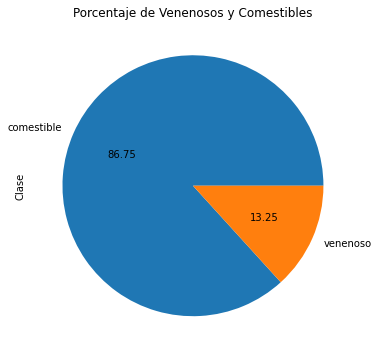

In [40]:
hongos_332['Clase'].value_counts().plot(kind = "pie",  autopct='%.2f', figsize=(6, 6), title='Porcentaje de Venenosos y Comestibles')

In [41]:
hongos_332["Clase"].value_counts()

comestible    288
venenoso       44
Name: Clase, dtype: int64

In [42]:
n = list()
n = hongos_332["Clase"].value_counts()
razon = n[1]/n[0]
razon

0.1527777777777778

Por lo que la razón de hongos venenosos entre hongos comestibles es 0.15277777

Posteriormente se hizo un DataFrame de variables dummy con las características restantes.

In [43]:
hongos_dummy = pd.DataFrame(None)
Clase_332 = hongos_332["Clase"].map({"venenoso":0, "comestible":1}).astype(int)
FSombrero_332 = pd.get_dummies(hongos_332["Forma_Sombrero"], prefix = "Forma_Sombrero")
SSombrero_332 = pd.get_dummies(hongos_332["Superficie_Sombrero"], prefix = "Superficie_Sombrero")
CSombrero_332 = pd.get_dummies(hongos_332["Color_Sombrero"], prefix = "Color_Sombrero")
Magulladura_332 = pd.get_dummies(hongos_332["Magulladura"], prefix = "Magulladura")
ELaminas_332 = pd.get_dummies(hongos_332["Espaciamiento_Laminas"], prefix = "Espaciamiento_Laminas")
DLaminas_332 = pd.get_dummies(hongos_332["Dimension_Laminas"], prefix = "Dimension_Laminas")
RTallo_332 = pd.get_dummies(hongos_332["Raiz_Tallo"], prefix = "Raiz_Tallo")
TSAnillo_332 = pd.get_dummies(hongos_332["Superficie_tallo_sobre_anillo"], prefix = "Superficie_tallo_sobre_anillo")
TBAnillo_332 = pd.get_dummies(hongos_332["Superficie_tallo_bajo_anillo"], prefix = "Superficie_tallo_bajo_anillo")
CSAnillo_332 = pd.get_dummies(hongos_332["Color_tallo_sobre_anillo"], prefix = "Color_tallo_sobre_anillo")
CBAnillo_332 = pd.get_dummies(hongos_332["Color_tallo_bajo_anillo"], prefix = "Color_tallo_bajo_anillo")
CVelo_332 = pd.get_dummies(hongos_332["Color_Velo"], prefix = "Color_Velo")
NAnillos_332 = pd.get_dummies(hongos_332["Num_anillos"], prefix = "Num_anillos")
TAnillo_332 = pd.get_dummies(hongos_332["Tipo_anillo"], prefix = "Tipo_anillo")
Poblacion_332 = pd.get_dummies(hongos_332["Poblacion"], prefix = "Poblacion")
Habitat_332 = pd.get_dummies(hongos_332["Habitat"], prefix = "Habitat")
hongos_dummy = pd.concat([Clase_332, FSombrero_332, SSombrero_332, CSombrero_332, Magulladura_332, ELaminas_332,
                          DLaminas_332, RTallo_332, TSAnillo_332, TBAnillo_332, CSAnillo_332, CBAnillo_332, 
                         CVelo_332, NAnillos_332, TAnillo_332, Poblacion_332, Habitat_332], axis = 1)

In [44]:
hongos_dummy

,Clase,Forma_Sombrero_campana,Forma_Sombrero_conica,Forma_Sombrero_convexa,Forma_Sombrero_mamelonado,Forma_Sombrero_plana,Superficie_Sombrero_asurcada,Superficie_Sombrero_escamoso,Superficie_Sombrero_fibroso,Superficie_Sombrero_liso,...,Poblacion_agrupados,Poblacion_dispersos,Poblacion_numerosos,Poblacion_solitario,Poblacion_varios,Habitat_bosques,Habitat_caminos,Habitat_hojas,Habitat_pastos,Habitat_residuos
4165,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4276,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4331,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
4364,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4491,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
8074,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
8096,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
8099,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [45]:
hongos_dummy.to_csv("BDhongos_dummy.csv", index = False)

El DataFrame hongos_dummy fue dividido en dos, uno que sólo contenía la variable de respuesta *Y* y el otro únicamente las predictoras *X*.

In [46]:
Y = hongos_dummy.iloc[:, 0]
X = hongos_dummy.iloc[:, 1:59]

In [47]:
X

,Forma_Sombrero_campana,Forma_Sombrero_conica,Forma_Sombrero_convexa,Forma_Sombrero_mamelonado,Forma_Sombrero_plana,Superficie_Sombrero_asurcada,Superficie_Sombrero_escamoso,Superficie_Sombrero_fibroso,Superficie_Sombrero_liso,Color_Sombrero_amarillo,...,Poblacion_agrupados,Poblacion_dispersos,Poblacion_numerosos,Poblacion_solitario,Poblacion_varios,Habitat_bosques,Habitat_caminos,Habitat_hojas,Habitat_pastos,Habitat_residuos
4165,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4276,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4331,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4364,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4491,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
8074,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
8096,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
8099,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [48]:
Y

4165    1
4276    1
4331    0
4364    0
4491    1
       ..
8063    1
8074    1
8096    1
8099    1
8109    1
Name: Clase, Length: 332, dtype: int32

Ahora dividiremos nuestros DataFrame en datos de prueba (30%) y datos de entrenamiento (70%).

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Con el código siguiente determinamos que la mejor profundidad para nuestro árbol de decisión es 5 debido a que en este nivel obtenemos la mayor precisión.

In [50]:
model = DecisionTreeClassifier()
parameters = [{'max_depth': [1,2,3,4,5,6,7,8,9,10]}]
clf = GridSearchCV(model, parameters, cv=5, scoring="accuracy")
clf.fit(X_train, Y_train)
print(clf.best_params_)

{'max_depth': 5}


Con nuestros datos de prueba llegamos a obtener un 100% de precisión el la clasificación de los hongos e imprimimos una matriz de confusión de estos resultados, donde nuestro *error tipo I* y *error tipo II* fueron cero.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        87

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



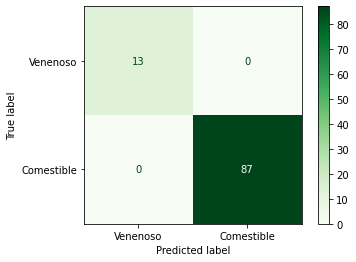

In [75]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, Y_train)

Y_test_hat = clf.predict(X_test)
print(classification_report(Y_test, Y_test_hat))
print(plot_confusion_matrix(clf, X_test, Y_test, cmap=plt.cm.Greens,
                            display_labels=['Venenoso', 'Comestible']))

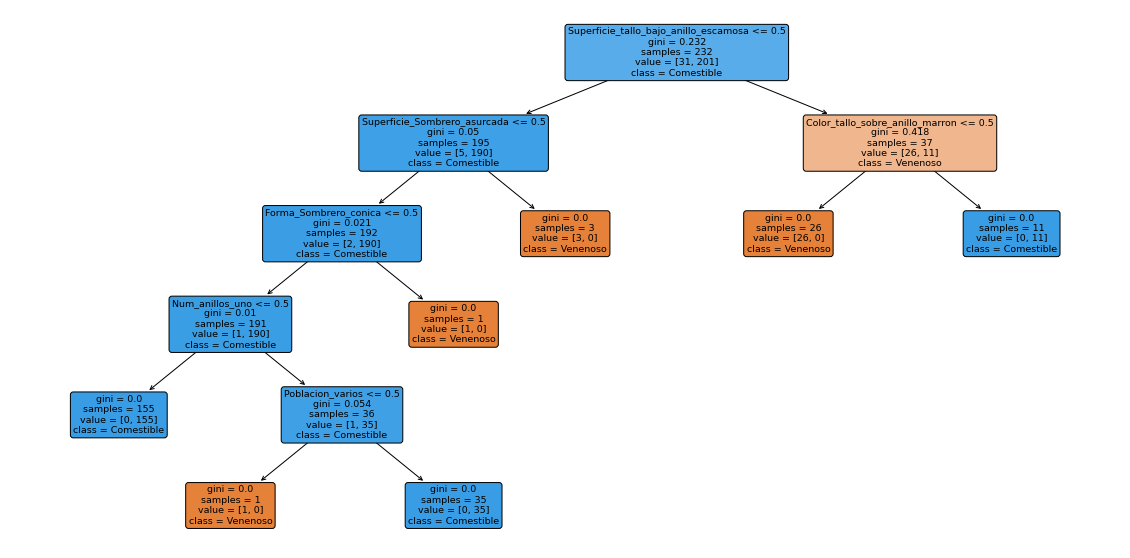

In [76]:
plt.figure(figsize=[20, 10])
out = tree.plot_tree(clf, rounded= True,
               filled= True,
               class_names = ['Venenoso', 'Comestible'],
               feature_names = ['Forma_Sombrero_campana', 'Forma_Sombrero_conica', 'Forma_Sombrero_convexa', 'Forma_Sombrero_mamelonado',
                               'Forma_Sombrero_plana', 'Superficie_Sombrero_asurcada', 'Superficie_Sombrero_escamoso', 'Superficie_Sombrero_fibroso', 'Superficie_Sombrero_liso',
                               'Color_Sombrero_amarillo', 'Color_Sombrero_ante', 'Color_Sombrero_blanco', 'Color_Sombrero_canela', 'Color_Sombrero_gris', 'Color_Sombrero_marron',
                               'Color_Sombrero_rojo', 'Color_Sombrero_rosa', 'Magulladura_no_tiene', 'Magulladura_tiene', 'Espaciamiento_Laminas_apretadas', 'Espaciamiento_Laminas_cercanas', 
                               'Dimension_Laminas_ancho', 'Dimension_Laminas_estrecho', 'Raiz_Tallo_bulboso', 'Raiz_Tallo_faltante', 'Raiz_Tallo_garrote', 'Superficie_tallo_sobre_anillo_escamosa',
                               'Superficie_tallo_sobre_anillo_fibrosa', 'Superficie_tallo_sobre_anillo_lisa', 'Superficie_tallo_sobre_anillo_sedosa', 'Superficie_tallo_bajo_anillo_escamosa', 
                               'Superficie_tallo_bajo_anillo_fibrosa', 'Superficie_tallo_bajo_anillo_lisa', 'Superficie_tallo_bajo_anillo_sedosa', 'Color_tallo_sobre_anillo_amarillo',
                               'Color_tallo_sobre_anillo_blanco', 'Color_tallo_sobre_anillo_marron', 'Color_tallo_sobre_anillo_rojo', 'Color_tallo_bajo_anillo_amarillo', 'Color_tallo_bajo_anillo_blanco',
                               'Color_tallo_bajo_anillo_marron', 'Color_tallo_bajo_anillo_rojo', 'Color_Velo_amarillo', 'Color_Velo_blanco', 'Num_anillos_dos', 'Num_anillos_uno', 
                               'Tipo_anillo_colgante', 'Tipo_anillo_evanescente', 'Poblacion_agrupados', 'Poblacion_dispersos', 'Poblacion_numerosos', 'Poblacion_solitario', 'Poblacion_varios',
                               'Habitat_bosques', 'Habitat_caminos', 'Habitat_hojas', 'Habitat_pastos', 'Habitat_residuos'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

### Conclusiónes


Gracias al análisis que realizamos a la base de datos pudimos identificar las principales características que determinan si un hongo es venenoso o comestible, estas en orden de relevancia son *Olor*, *Color_Espora* y *Color_Laminas*. Resultó particularmente sorprendente descubrir que cada categoría de hongos tiene olores muy peculiares y que la única confusión estaría dada en el caso de que el hongo no muestre olor, en términos generales podemos concluir que sólo al tomar en cuenta las tres características más importantes estaríamos clasificando a todos los hongos con excepción de los que no cuenten con olor y que además el color de sus láminas y esporas sea blanco, los cuales son 332 hongos de 8124, es decir que, sólo con conocer estas tres características fuimos capaces de determinar si un hongo es venenoso o no con un 95.9133% de la base de datos.

También podemos decir que cumplimos con nuestro objetivo secundario, ya que con ayuda del árbol de decisión para las características restantes se logró clasificar en su totalidad a los hongos en la base de datos, y que, al ser un esquema de fácil entendimiento consigue que la clasificación se realice en un tiempo menor.